In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unnecessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

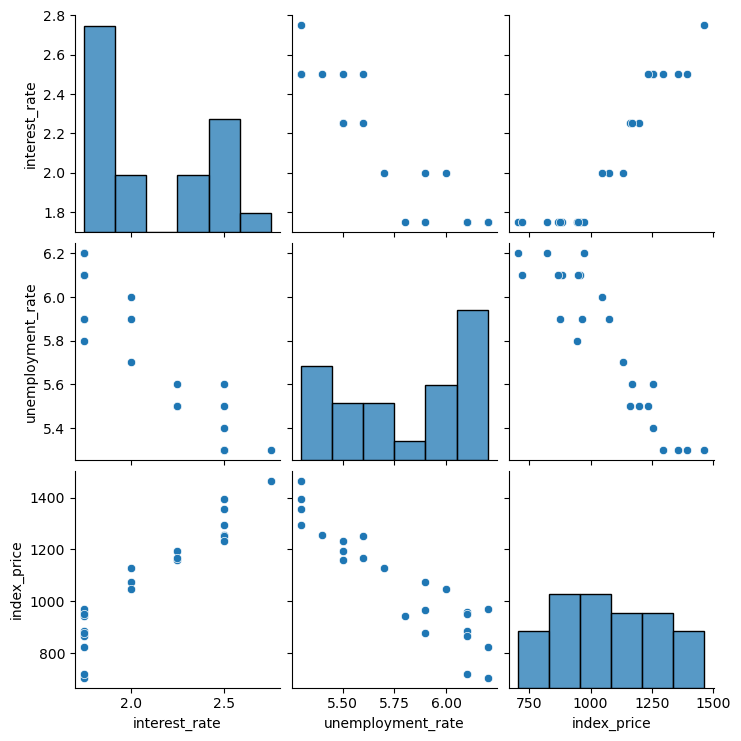

In [7]:
#doing some visualizations
import seaborn as sb

sb.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


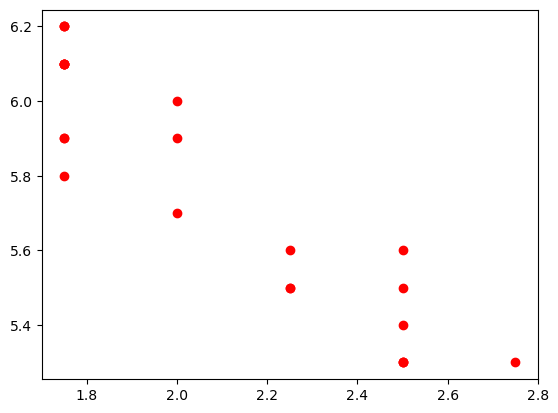

In [9]:
#visualize closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')

In [13]:
#independent and dependent feature

#x=df_index[['intrest_rate,unemployment_rate']]
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

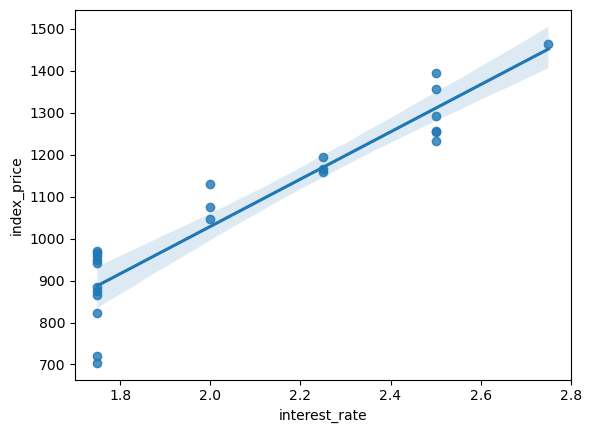

In [24]:
import seaborn as sb
sb.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

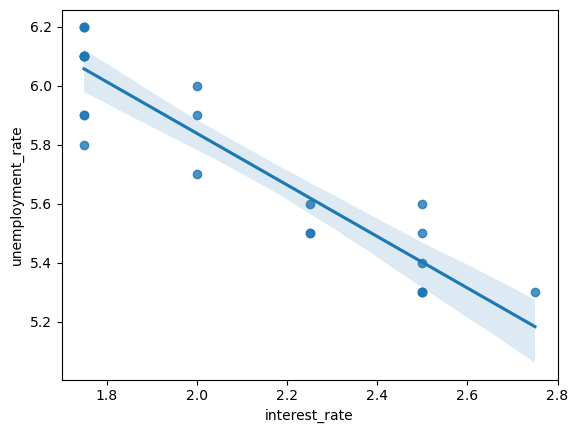

In [25]:
sb.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [26]:
#sandard scaling

from sklearn.preprocessing import StandardScaler


In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [29]:
x_train

array([[-0.8660254 ,  1.27807831],
       [ 0.8660254 , -1.14354375],
       [ 0.        , -0.3363364 ],
       [-0.8660254 ,  0.06726728],
       [-0.8660254 ,  1.27807831],
       [ 1.73205081, -1.14354375]])

In [30]:
x_test

array([[ 0.43046326, -0.7902198 ],
       [-0.9783256 ,  1.24177397],
       [ 1.83925213, -1.37078945],
       [-0.9783256 ,  0.95148915],
       [-0.27393117,  0.3709195 ],
       [ 0.43046326, -0.49993498],
       [-0.9783256 ,  0.3709195 ],
       [ 1.1348577 , -1.37078945],
       [-0.9783256 ,  1.24177397],
       [ 1.1348577 , -0.49993498],
       [ 1.1348577 , -1.37078945],
       [-0.27393117,  0.66120432],
       [-0.9783256 ,  0.95148915],
       [ 1.1348577 , -1.37078945],
       [ 1.1348577 , -1.08050463],
       [-0.9783256 ,  1.24177397],
       [-0.9783256 ,  0.95148915],
       [-0.9783256 ,  0.3709195 ]])

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [35]:
validation_score # gives mse as no of cv

array([-10823.9569161 ,  -3444.71180556,  -9193.6       ])

In [36]:
np.mean(validation_score)

-7820.7562405517665

In [37]:
#performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
##Predicions
y_pred=lr.predict(x_test)

In [40]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

89.97791862049174
10682.50509868587
103.35620493558125


In [41]:
#assumptions
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7560187688535143


In [42]:
# display adjusted r2
R2=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(R2)

0.7234879380339828


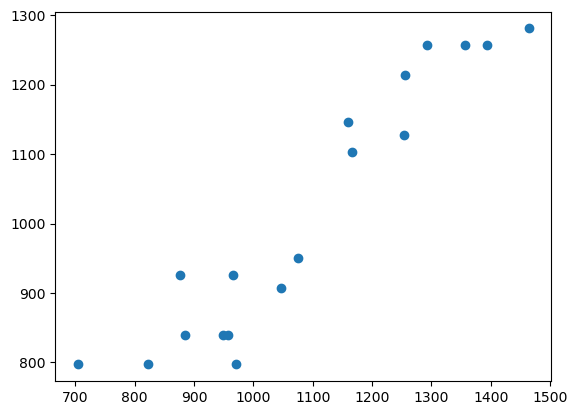

In [43]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred#errors
print(residuals)

8      12.792513
16    173.943132
0     183.121113
18     44.047288
11    124.815744
9      63.688357
13     39.255600
1     137.560969
21     24.943132
5     126.248501
2     100.560969
12    139.711588
15    118.047288
3      36.560969
4      42.456813
22    -93.056868
17    109.047288
20    -49.744400
Name: index_price, dtype: float64


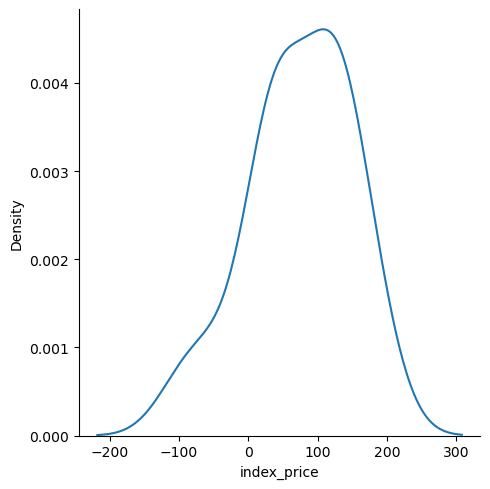

In [46]:
#plotting
sb.displot(residuals,kind='kde')

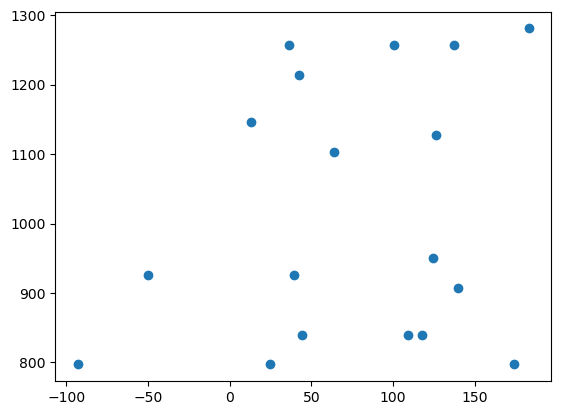

In [47]:
#scatterplot

plt.scatter(residuals,y_pred)

In [48]:
#OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [49]:
model.summary()

c:\Users\RITIK KUMAR\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.455
Method:                 Least Squares   F-statistic:                            0.06202
Date:                Mon, 16 Jun 2025   Prob (F-statistic):                       0.941
Time:                        21:42:40   Log-Likelihood:                         -50.055
No. Observations:                   6   AIC:                                      104.1
Df Residuals:                       4   BIC:                                      103.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.6963   1044.618      0.033      0.975   -2865.627    2935.020
x2          -147.7716   1044.618     -0.141      0.894   -3048.095    2752.552
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.006
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.437
Skew:                           0.168   Prob(JB):                        0.804
Kurtosis:                       1.721   Cond. No.                         3.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(lr.coef_)

[  34.69626498 -147.77156853]
